# What can I learn about my music listening patterns?

## Overview

The core objective of this exploration is to find some insight or interesting patterns in my spotify listening history.

## Dataset

The initial dataset which spotify provides is presented to us in a very human readable form, without much information regarding the songs other than the artist and track names, along with the time of play.

This initial dataset had 17627 rows. This includes songs and podcasts that were played over the course of the last one year from the date of requesting for this data, which is, in this case, the period between July 2019 - July 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_style("darkgrid")

#### 1. Number of songs played over time of day

Here I wanted to check how many songs I was listening to, on an average, through out the course of a day.

In [18]:
spotify_data_songs = pd.read_csv('spotify_data_songs.csv')
spotify_data_songs.endTime = pd.to_datetime(spotify_data_songs.endTime, format="%Y-%m-%d %H:%M")

In [19]:
# Here, I am splitting the main dataset into various bins based on the hours of day.

hrs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
names = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', 
        '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23']
time_ranges = pd.cut(spotify_data_songs.endTime.dt.hour, hrs, labels=names)

The following graph shows the listening pattern over the course of a day. There are 2 ranges of time where the frequency of listening is higher:
1. 0 - 4 a.m
2. 12 - 18 a.m

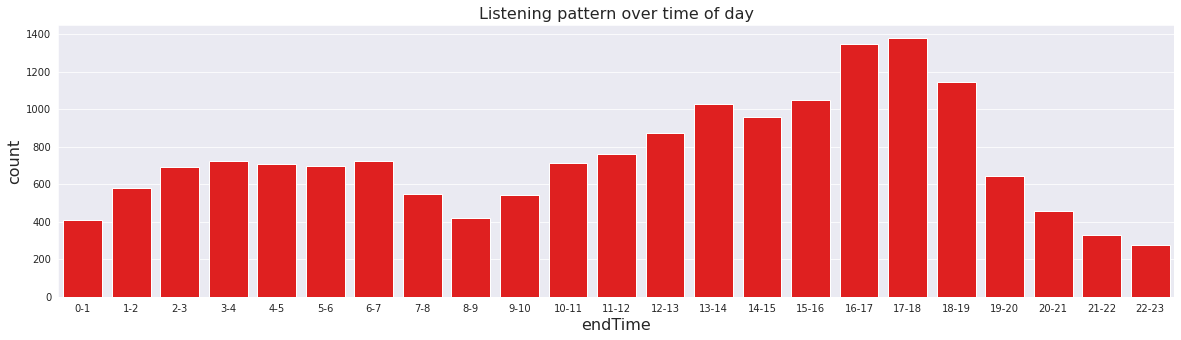

In [20]:
plt.figure(figsize=(20, 5))
plt.title("Listening pattern over time of day", fontsize=16)
plt.xlabel("Time of Day", fontsize=16)
plt.ylabel("Number of Songs", fontsize=16)
sns.countplot(time_ranges, color='r');

The following graph shows the listening pattern over the course of a week. Thurdays have the least number of streams, where as the weekend has the most number of streams. Also, Wednesday is a weekday with a very high number of streams.

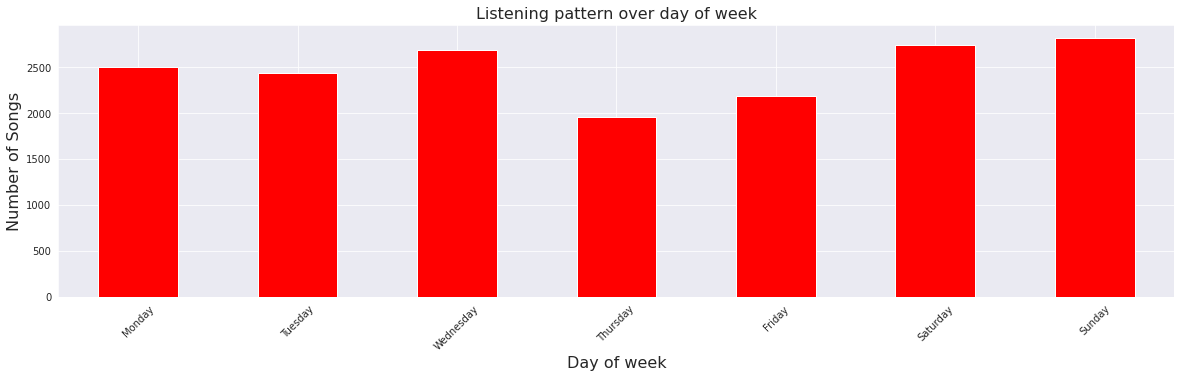

In [21]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(20, 5))
plt.title("Listening pattern over day of week", fontsize=16)
plt.xlabel("Day of week", fontsize=16)
plt.ylabel("Number of Songs", fontsize=16)
day_ranges = spotify_data_songs.endTime.dt.dayofweek.value_counts().sort_index()
ax = day_ranges.plot(kind="bar", color='r')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(day_names);
plt.xticks(rotation=45);

In [22]:
day_hr_count = spotify_data_songs.groupby(
    [spotify_data_songs.endTime.dt.dayofweek, spotify_data_songs.endTime.dt.hour]
).count()['trackName']
day_hr_count.index.set_names(["day", "hour"], inplace=True)

#### From the following graphs we notice:
1. Saturdays I sleep late, as the number of songs played during the hours 0 - 5 is higher than on other days.
2. Mondays and Sundays, I listen to a lot of songs in the early hours 5 - 10, due to the rising nature of the graph in those hours, as opposed to other days.
3. Thursdays followed by Tuesdays appear to be the most productive days because lesser number of songs are played during the morning hours 5 - 15.
4. Friday midnight ( Thursday late nights ), I listen to very few songs, because of the vertically downward nature of the graph.
5. Wednesday is the one weekday, where I listen to a lot of songs. In fact, the peaks are higher than the weekend. So, Wednesday is the least productive weekday.

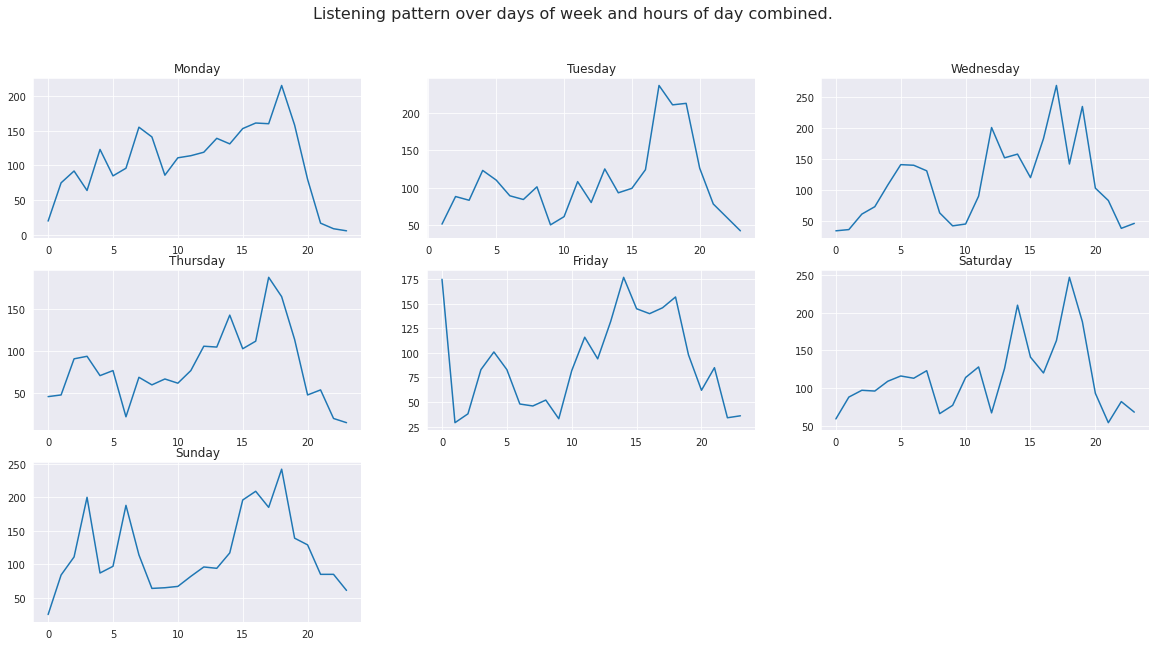

In [25]:
fig, ax = plt.subplots(figsize=[20, 10])
lines = []
rows = 3
cols = 3
sub = 1
fig.suptitle("Listening pattern over days of week and hours of day combined.", fontsize=16)
day_numbers = [0, 1, 2, 3, 4, 5, 6]
for day in day_numbers:
    plt.subplot(rows, cols, sub)
    ax = sns.lineplot(data=day_hr_count.loc[day])
    ax.set_xlabel('')
    ax.set_title(day_names[day])
    sub = sub + 1

1. Pyramids by Frank Ocean, is the highest played track with 60 plays.
2. Of the top 10 songs played:
   1. Four of the songs are from the same album "Jaago" by the artist "Lifafa".
   2. Two of the songs are from another artist "The Yellow Diary".
3. Except for Frank Ocean's Pyramids, all the other top played songs are Hindi songs.
4. Highest played artist is Lifafa.

In [26]:
song_play_counts = spotify_data_songs.groupby(
    ['artistName', 'trackName']
).count().sort_values('endTime', ascending=False).reset_index().rename(
    columns={'endTime': 'plays'}
).drop(columns='msPlayed')
song_play_counts.index += 1
song_play_counts[:10]

,artistName,trackName,plays
1,Frank Ocean,Pyramids,60
2,Lifafa,Jaago,37
3,Kailash Kher,Allah Ke Bande,34
4,Sathyaprakash,O Kalala Kathala,33
5,Lifafa,Nikamma,29
6,Lifafa,Din Raat,26
7,The Yellow Diary,Dheere Se,26
8,Agnee,Shaam Tanha,24
9,The Yellow Diary,Tere Jeya Hor Disda,22
10,Lifafa,Ek Nagma,21


In [33]:
artist_play_counts = spotify_data_songs.groupby(['artistName']).count().sort_values(
    'endTime', ascending=False
).reset_index().rename(
    columns={'endTime': 'plays'}
).drop(columns=['msPlayed', 'trackName'])
artist_play_counts.index += 1
artist_play_counts[:10]

,artistName,plays
1,Lifafa,194
2,Frank Ocean,166
3,Kailash Kher,137
4,Gorillaz,136
5,Amit Trivedi,135
6,A.R. Rahman,123
7,Pink Floyd,101
8,The Weeknd,100
9,King Crimson,90
10,David Gilmour,85


In [4]:
updated_song_data = pd.read_csv("updated_song_data.csv")
updated_song_data.endTime = pd.to_datetime(updated_song_data.endTime, format="%Y-%m-%d %H:%M:%S" )

Correlation heatmaps give us information regarding the pairwise relation between various audio features.

1. High positive correlation between:
    1. Energy and Loudness 81%
    2. Valence and Energy, Danceability, loudness 50%, 53%, 42%.
2. High negative correlation between:
    1. Acousticness and Energy Looudness -75%, -65% 


1. Darker color ( Blue ) indicates high positive correlation
2. Lighter color ( cream/ white ) indicates high negative correlation.



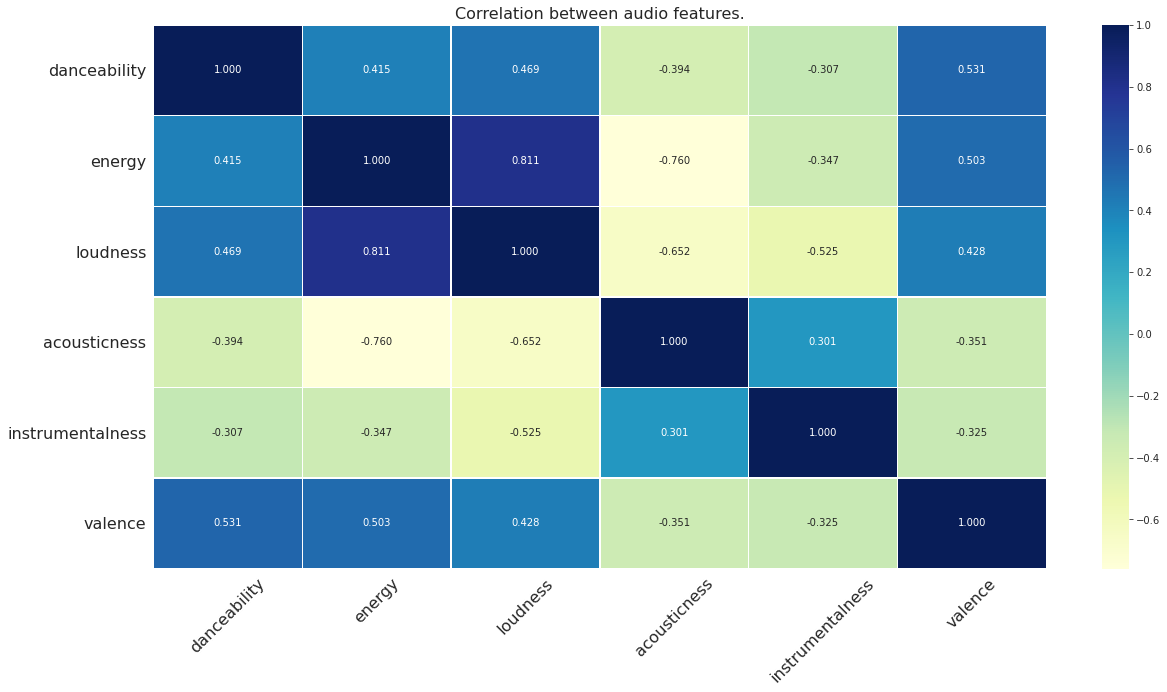

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
corr = updated_song_data.drop(
    columns=["msPlayed", "duration_ms", "key", "mode", "liveness", "speechiness", "tempo", "time_signature"]
).corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    fmt=".3f",
    linewidths=.5,
    cmap="YlGnBu"
);
plt.xticks(rotation=45, fontsize=16);
plt.yticks(rotation=0, fontsize=16)
plt.title('Correlation between audio features.', fontsize=16);
print("""
1. Darker color ( Blue ) indicates high positive correlation
2. Lighter color ( cream/ white ) indicates high negative correlation.
""")

#### 6. Songs streamed month wise.

In [5]:
updated_song_data['season'] = pd.cut(
    (updated_song_data.endTime.dt.dayofyear + 11) % 366,
    [0, 91, 183, 275, 366],
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)

In [6]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

In [7]:
def get_wordcloud(month_df):
    month_df = pd.DataFrame(month_df.lyrics.dropna())
    month_df.lyrics = month_df.lyrics.str.replace(r'\[.*\]|\(.*\)', '')
    all_words = ""
    for song in month_df.lyrics:
        tokens = song.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        for words in tokens:
            all_words += words + ' '
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                min_font_size = 10).generate(all_words) 
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

The wordcloud is a high level representation of the words of a string.
In our case, we are trying to understand the theme of the songs played in the winter season, so we join all the lyrics we have for the songs played in the winter and create the wordcloud. 

We can notice that some of the most commonly appearing words are "Love", "Know", "feel", "heart", "never", "wanna". All pointing to the theme  of Love.

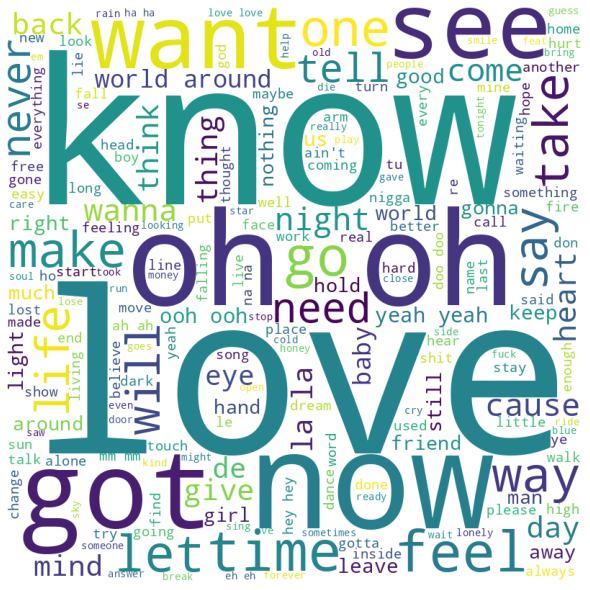

In [8]:
get_wordcloud(updated_song_data.query("season == 'Winter'"))

#### We'll understand the tempo of the songs played with respect to the seasons.

In [11]:
mean_song_features = updated_song_data.groupby([updated_song_data.season]).mean()
mean_song_features.drop(columns=["msPlayed", "duration_ms", "mode", "liveness", "key", "loudness", "speechiness", "time_signature"], inplace=True)
mean_song_features.tempo /= 1000

From the following graph, we get a high level overview of all the song characteristics.

1. Analogous to our previous observations, the tempo remains constant throughout the year. 
2. Spring and Summer have more of acoustic and instrumental songs being played.
3. In Fall, higher energy songs are played, which have valence and danceability

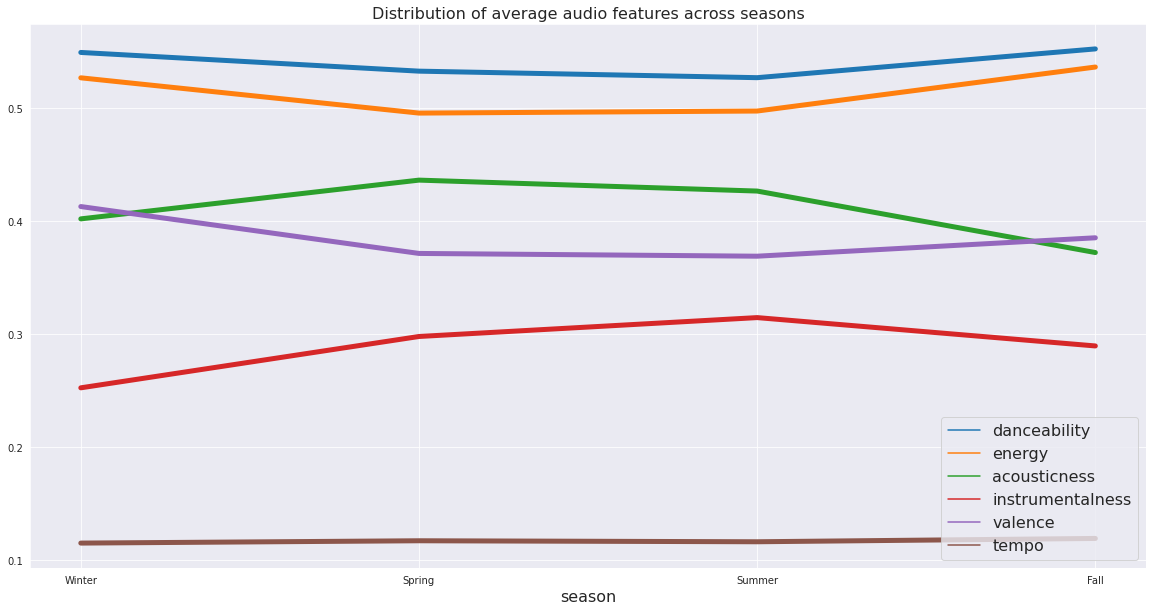

In [10]:
plt.figure(figsize=[20, 10])
ax = sns.lineplot(data=mean_song_features, dashes=False, linewidth=5);
plt.title('Distribution of average audio features across seasons', fontsize=16);
plt.xlabel("season", fontsize=16)
plt.legend(loc="lower right", markerscale=22, fontsize=16);

In [39]:
# Total number of milliseconds, I have listened to music for, over the course of a year.
spotify_data_songs.msPlayed.sum()

3550291840

## Conclusion

1. I spent over a month of a year listening to music, either consciously or subconsciously.
2. I mostly listen to calm, relaxing music which have a moderate to low tempo.
3. I like listening to love songs, a lot, especially in the winter.
4. I like Frank Ocean and Lifafa.
5. I'm most productive on Thursdays and Tuesdays, and least productive on Wednesdays.

#### Total listening time - 3550291840ms = 986.2 hours = 41.09 days = 5.87 weeks = 1.35 months

In [ ]:
!jupyter nbconvert Explanatory_Analysis_Spotify_Dataset_SlideDeck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Explanatory_Analysis_Spotify_Dataset_SlideDeck.ipynb to slides
[NbConvertApp] Writing 1040377 bytes to Explanatory_Analysis_Spotify_Dataset_SlideDeck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Explanatory_Analysis_Spotify_Dataset_SlideDeck.slides.html
Use Control-C to stop this server
Gtk-Message: 13:37:05.890: Failed to load module "appmenu-gtk-module"
Opening in existing browser session.
